# Random_Forest_by_Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions

### Load the iris dataset and explore its structure

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

### Convert data to a DataFrame for better visualization

In [4]:
iris_df = pd.DataFrame(data=np.c_[X,y], columns=iris.feature_names + ['target'])
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


### Split the Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Create and train Random Forest Classifier

In [6]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Use the trained model to make predictions on the test data

In [7]:
y_pred = rf_classifier.predict(X_test)

In [8]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Evaluate the model's performance using metrics like accuracy score, confusion matrix, and classification report

In [9]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"Classification Report: \n{class_report}")

Accuracy: 1.0
Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Random forest models also provide feature importance scores, which can be useful for feature selection

In [10]:
feature_importances = rf_classifier.feature_importances_
print("Feature Importances:")
for feature_name, importance in zip (iris.feature_names, feature_importances):
    print(f"{feature_name}: {importance}")

Feature Importances:
sepal length (cm): 0.10809762464246378
sepal width (cm): 0.030386812473242528
petal length (cm): 0.43999397414456937
petal width (cm): 0.4215215887397244


### you can visualize the decision boundaries of the Random Forest Model, This step is Optional

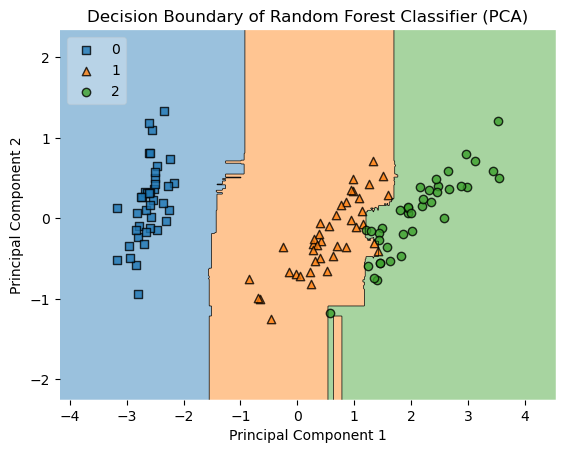

In [11]:
from sklearn.decomposition import PCA

#Reduce the dimensionality of the data to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

#Fit the Random Forest classifier on the reduced data
rf_classifier.fit(X_train_pca, y_train)

#Plot decision boundaries in the 2D PCA space
plot_decision_regions(X_train_pca, y_train, clf = rf_classifier, legend=2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundary of Random Forest Classifier (PCA)")
plt.show()